# Ways to load data into a plot

In this notebook, we look at the different ways to plot data in QExPy. QExPy has several different (equivalent) ways to create a plot based on data, depending on the nature of the data.

First, we must import QExPy:

In [1]:
#import the package
import qexpy as q

#We can choose the method in which the plots are build:
q.plot_engine = "bokeh" #These plots are more interactive,
                        #but not as good to save to file
                        #This is the default (so no need to specify)
    
#q.plot_engine = "mpl" #These plots are a little easier 
                       #to manipulate and to save to file - try it out!

Loading BokehJS ...

## Data where the x-values have no uncertainty
Suppose that we have multiple measurements of a quantity $y$ corresponding to some quantity $x$. Further, let us assume that all of the $y$ measurement have the same uncertainty, and the $x$ measurements have no uncertainty. Below, we show several equivalent ways to load the data into a plot.

In each case, we create a Plot Object (with variable names starting with 'fig'), and then use the show() function of the plot object to actually display it. The most convenient way to load data is usually in the form of an array (or a list as they are called in python) - arrays are given by a comma-seperated list of numbers surrounded by square brackets [ ].

### Passing data directly to MakePlot()

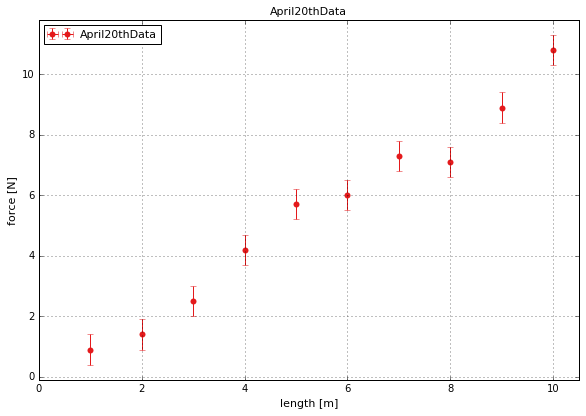

In [2]:
#The most direct method is to use MakePlot with the data specified directly.

#We only need to specify the data, but if we give additional parameters
#QExPy will label the axes for us
fig1 = q.MakePlot(xdata = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  ydata = [0.9, 1.4, 2.5, 4.2, 5.7, 6., 7.3, 7.1, 8.9, 10.8],
                  yerr = 0.5,
                  xname = 'length', xunits='m',
                  yname = 'force', yunits='N',
                  data_name = 'April20thData')
#and then we can show the figures:
fig1.show()

### Passing MeasurementArray to MakePlot()

x measurements:
1 +/- 0,
2 +/- 0,
3 +/- 0,
4 +/- 0,
5 +/- 0,
6 +/- 0,
7 +/- 0,
8 +/- 0,
9 +/- 0,
10 +/- 0

y measurements:
length_0 = 1.6 +/- 0.5 [mm],
length_1 = 3.1 +/- 0.5 [mm],
length_2 = 4.0 +/- 0.5 [mm],
length_3 = 4.6 +/- 0.5 [mm],
length_4 = 4.6 +/- 0.5 [mm],
length_5 = 5.4 +/- 0.5 [mm],
length_6 = 6.9 +/- 0.5 [mm],
length_7 = 8.8 +/- 0.5 [mm],
length_8 = 8.3 +/- 0.5 [mm],
length_9 = 10.6 +/- 0.5 [mm]


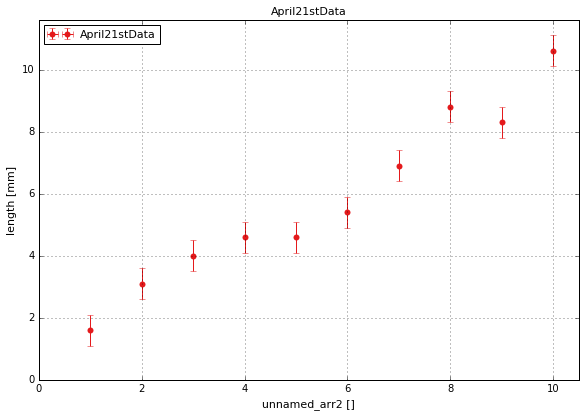

In [3]:
#Another option, is to identify our measurements of x as y as two independent
#arrays of measurements. In this case, we first use the MeasurementArray Object.

#With the MeasurementArray, we can specify the values, the error on those values 
#(0 if unspecified), as well as the name and units

xmes = q.MeasurementArray([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ymes = q.MeasurementArray([1.6, 3.1, 4., 4.6, 4.6, 5.4, 6.9, 8.8, 8.3, 10.6],
                          error= 0.5,
                          name = 'length', units='mm')

#Let's print out our MeasurementArrays:
print("x measurements:")
print(xmes)
print("\ny measurements:")
print(ymes)
#As you will note, the x measurements have no name or units, so those
#are not diplayed, whereas for y, we specified a name and unit

#we can now plot these by giving MakePlot the MeasurementArrays directly, 
#and it will know to get the names and units that we specified:
fig2 = q.MakePlot(xmes, ymes, data_name="April21stData")
fig2.show()
#As you can see, the plot will have an automatic label for the x axis
#since we never specified what that label should be. We can add our 
#own label by calling:
#fig2.set_labels(xtitle = "length [m]")
#before the show() command - Try it!

### Passing an XYDataSet to MakePlot()

length_0 = 1 +/- 0 [m] , force_0 = 0.6 +/- 0.5 [N]
length_1 = 2 +/- 0 [m] , force_1 = 1.6 +/- 0.5 [N]
length_2 = 3 +/- 0 [m] , force_2 = 3.5 +/- 0.5 [N]
length_3 = 4 +/- 0 [m] , force_3 = 4.1 +/- 0.5 [N]
length_4 = 5 +/- 0 [m] , force_4 = 4.6 +/- 0.5 [N]
length_5 = 6 +/- 0 [m] , force_5 = 5.6 +/- 0.5 [N]
length_6 = 7 +/- 0 [m] , force_6 = 6.1 +/- 0.5 [N]
length_7 = 8 +/- 0 [m] , force_7 = 7.9 +/- 0.5 [N]
length_8 = 9 +/- 0 [m] , force_8 = 8.7 +/- 0.5 [N]
length_9 = 10 +/- 0 [m] , force_9 = 9.8 +/- 0.5 [N]



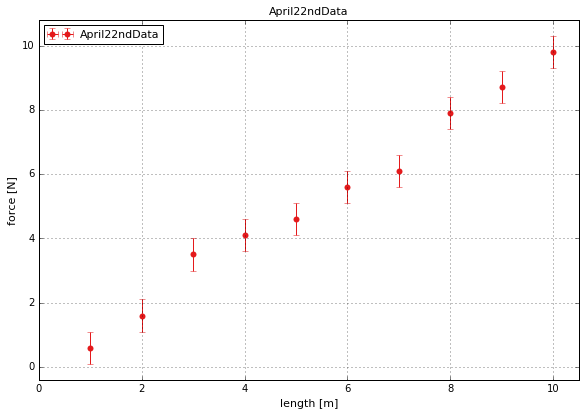

In [4]:
#A third option, is to use an XYDataSet to represent our paired set of 
#x and y data. In fact, the XYDataSet is how QExPy internally holds
#the data that are passed when calling MakePlot()

#The datasets can be built either directly from the data or from 
#two measurement arrays, inmuch the same way as we passed the data
#directly to the plots


xy3 = q.XYDataSet( xdata = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  ydata = [0.6, 1.6, 3.5, 4.1, 4.6, 5.6, 6.1, 7.9, 8.7, 9.8],
                  yerr = 0.5,
                  xname = 'length', xunits='m',
                  yname = 'force', yunits='N',
                  data_name = 'April22ndData')

#Let's print out the dataset to see what it looks like:
print(xy3)

#We can now build the figure from the dataset directly:
fig3 = q.MakePlot(xy3)
fig3.show()


### Exercise:
Produce a plot from a dataset, where the dataset has been created from 2 MeasurementArrays

In [5]:
## Exercise 

#In a similar way as we produce a plot from 2 MeasurementArrays, we can 
#produce an XYDataSet from 2 MeasurementArrays()

#xmes = MeasurementArray()
#ymes = MeasurementArray()
#xy4 = XYDataSet(xdata = x, ydata = y)
#fig4 = q.MakePlot(xy4)
#fig4.show()

## Data when the y uncertainty on each point is different

It is often the case that each point has a different uncertainty. In this case, we can specify the yerr argument of the various functions to be an array rather than a single number. The array needs to obviously of the same length as that for the ydata.



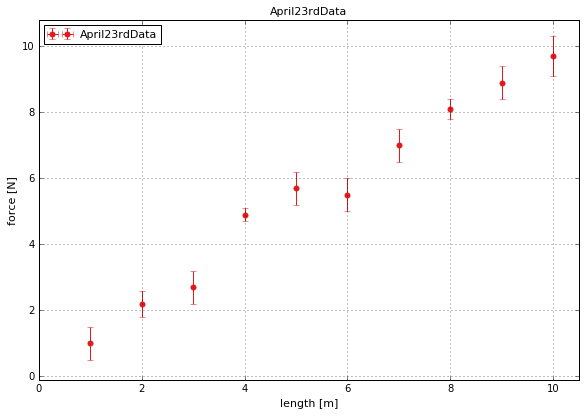

In [6]:
#To use different error bars on each point, we specify the yerr argument of MakePlot
#to be an array instead of a single number
fig5 = q.MakePlot(xdata = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  ydata = [1., 2.2, 2.7, 4.9, 5.7, 5.5, 7., 8.1, 8.9, 9.7],
                  yerr = [0.5, 0.4, 0.5, 0.2, 0.5, 0.5, 0.5, 0.3, 0.5, 0.6],
                  xname = 'length', xunits='m',
                  yname = 'force', yunits='N',
                  data_name = 'April23rdData')
fig5.show()

## Using MeasurementArray to create a plot with varying uncertainties in y

By specifying the yerr argument as an array, you can use MeasurementArray or XYDataSet to specify uncertainties in y that are different for each point. Note that for MeasurementArray, the argument is called error instead of yerr, since a MeasurementArray is not aware of whether it contains data for x or for y, or for some completely different purpose.

Here we use yet a different method of creating a MeasurementArray for the y values, by passing pairs of values corresponding to the measured y values and their uncertainty:

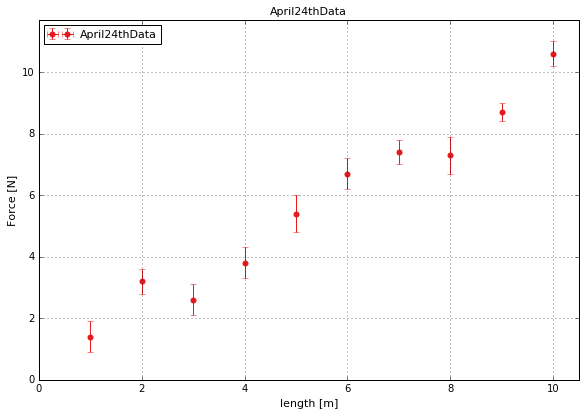

In [7]:
#Define the y measurements as paired values of measurement and uncertainty
ymes = q.MeasurementArray([
        (1.4, 0.5),
        (3.2, 0.4),
        (2.6, 0.5),
        (3.8, 0.5),
        (5.4, 0.6),
        (6.7, 0.5),
        (7.4, 0.4),
        (7.3, 0.6),
        (8.7, 0.3),
        (10.6, 0.4)],
        name = 'Force',
        units = 'N')

#we will use the same values for x as above, so no need to redefine them
#let's build a dataset out of the measurement arrays, and then build the figure
#from the dataset instead of the measurement arrays.
#When we defined xmes, we didn't give the x values names or units,
#so let's take the opportunity to name them in the data set:
xy6 = q.XYDataSet(xdata = xmes, ydata = ymes,
                   xname = 'length', xunits='m',
                   data_name = 'April24thData')
fig6 = q.MakePlot(xy6)
fig6.show()


## Data when both x and y have uncertainties:

Adding uncertainties in the x direction is trivial, and the Plot Objects can be generated in the same way, simply by specifying the additional keyword 'xerr' (or 'error' in the case of a MeasurementArray). The uncertainties in x can be specifed as a single number to be applied to all data points, or as an array to have different errors on each point. 

### Example: Passing the data as an XYDataSet to MakePlot()


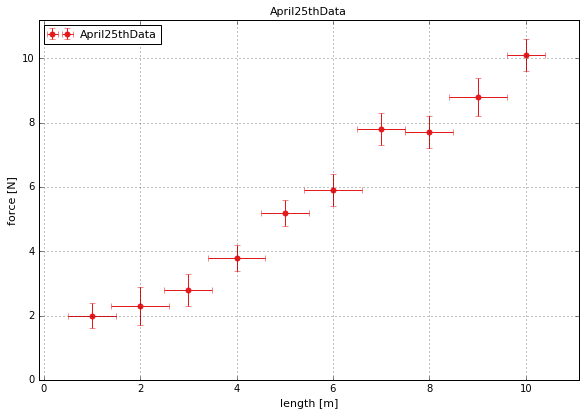

In [8]:
xy7 = q.XYDataSet(xdata = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  xerr = [0.5, 0.6, 0.5, 0.6, 0.5, 0.6, 0.5, 0.5, 0.6, 0.4],
                  ydata = [2., 2.3, 2.8, 3.8, 5.2, 5.9, 7.8, 7.7, 8.8, 10.1],
                  yerr = [0.4, 0.6, 0.5, 0.4, 0.4, 0.5, 0.5, 0.5, 0.6, 0.5],
                  xname = 'length', xunits='m',
                  yname = 'force', yunits='N',
                  data_name = 'April25thData')

fig7 = q.MakePlot(xy7)
fig7.show()

# Plotting multiple data sets on the same figure

Internally, the QExPy Plot objects store a list of the data sets that they need to plot. Everytime that we initialize a Plot Object, we also initialize an internal list of data sets that it can hold. 

For example, let us add the data set from the third figure to the first figure, and plot them both together:



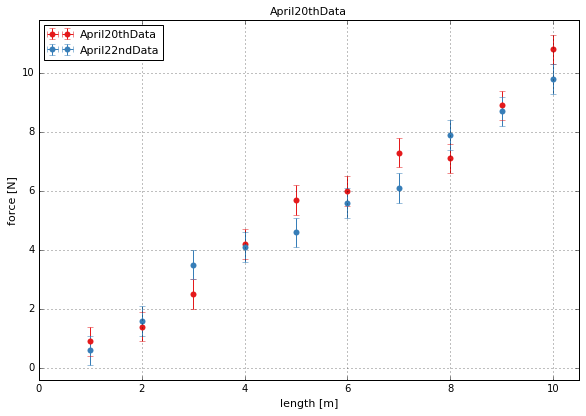

In [9]:
#We defined a dataset called xy3 when we created figure 3.
#let's add that dataset to figure 1, and show figure 1 again
fig1.add_dataset(xy3)
fig1.show()

When we created figure 2, we did not use a dataset (we used 2 MeasurementArrays). However, when we created the figure, QExPy internally created a data set. Let's add that dataset to figure 1 as well:

1 +/- 0 [m] , length_0 = 1.6 +/- 0.5 [mm]
2 +/- 0 [m] , length_1 = 3.1 +/- 0.5 [mm]
3 +/- 0 [m] , length_2 = 4.0 +/- 0.5 [mm]
4 +/- 0 [m] , length_3 = 4.6 +/- 0.5 [mm]
5 +/- 0 [m] , length_4 = 4.6 +/- 0.5 [mm]
6 +/- 0 [m] , length_5 = 5.4 +/- 0.5 [mm]
7 +/- 0 [m] , length_6 = 6.9 +/- 0.5 [mm]
8 +/- 0 [m] , length_7 = 8.8 +/- 0.5 [mm]
9 +/- 0 [m] , length_8 = 8.3 +/- 0.5 [mm]
10 +/- 0 [m] , length_9 = 10.6 +/- 0.5 [mm]



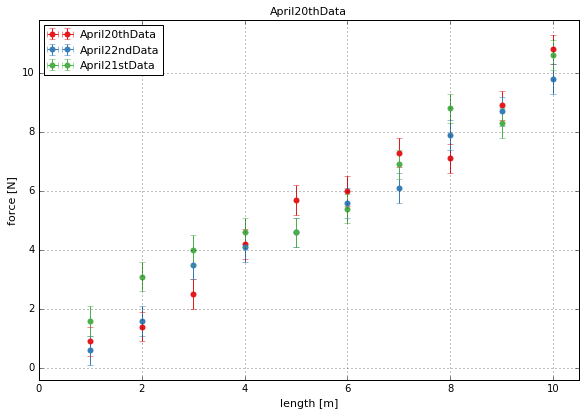

In [10]:
#Let's retrieve the dataset from figure 2:
xy2 = fig2.get_dataset()
#Let's print it out to see if it what we put in
print(xy2)
#Now, let's add it to figure 1
fig1.add_dataset(xy2)
#the above lines could have been combined into 1:
#fig1.add_dataset(fig2.get_dataset())
fig1.show()

At this point, figure 1, now has 3 datasets in it. We can retrieve those data sets individually by specifying their index. We can use either the get_dataset() function above, or directly access the dataset inside of fig1. Here we print out the first and third data set using the two methods:

In [11]:
#Print out the first dataset of fig1, it's original dataset, using get_data_set. Note
#that the first dataset has and index of 0, not 1:
print(fig1.get_dataset(0))

#Now we print the third (index 2) data set accessing it directly, using square brackets
print(fig1.datasets[2])


length_0 = 1 +/- 0 [m] , force_0 = 0.9 +/- 0.5 [N]
length_1 = 2 +/- 0 [m] , force_1 = 1.4 +/- 0.5 [N]
length_2 = 3 +/- 0 [m] , force_2 = 2.5 +/- 0.5 [N]
length_3 = 4 +/- 0 [m] , force_3 = 4.2 +/- 0.5 [N]
length_4 = 5 +/- 0 [m] , force_4 = 5.7 +/- 0.5 [N]
length_5 = 6 +/- 0 [m] , force_5 = 6.0 +/- 0.5 [N]
length_6 = 7 +/- 0 [m] , force_6 = 7.3 +/- 0.5 [N]
length_7 = 8 +/- 0 [m] , force_7 = 7.1 +/- 0.5 [N]
length_8 = 9 +/- 0 [m] , force_8 = 8.9 +/- 0.5 [N]
length_9 = 10 +/- 0 [m] , force_9 = 10.8 +/- 0.5 [N]

1 +/- 0 [m] , length_0 = 1.6 +/- 0.5 [mm]
2 +/- 0 [m] , length_1 = 3.1 +/- 0.5 [mm]
3 +/- 0 [m] , length_2 = 4.0 +/- 0.5 [mm]
4 +/- 0 [m] , length_3 = 4.6 +/- 0.5 [mm]
5 +/- 0 [m] , length_4 = 4.6 +/- 0.5 [mm]
6 +/- 0 [m] , length_5 = 5.4 +/- 0.5 [mm]
7 +/- 0 [m] , length_6 = 6.9 +/- 0.5 [mm]
8 +/- 0 [m] , length_7 = 8.8 +/- 0.5 [mm]
9 +/- 0 [m] , length_8 = 8.3 +/- 0.5 [mm]
10 +/- 0 [m] , length_9 = 10.6 +/- 0.5 [mm]



If a Plot Object has multiple data sets, and the index is not specified when using get_dataset(), then the last dataset is returned (that's why we didn't need to specify the index when got the dataset from fig2). When accessing the dataset directly, then one must specify an index using square brackets.

### Starting from an empty plot
Now that we know how to add data to a plot, we can generate plots "from scratch", without specifying any data, and then adding datasets. Let's plot datasets from figures 6 and 7 onto a fresh figure. We'll also choose our own colours for the datasets and override the defaults

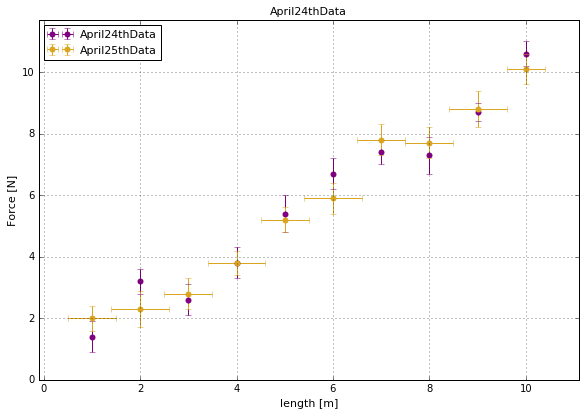

In [12]:
#Here we make a plot with no data
fig8 = q.MakePlot()
fig8.add_dataset(fig6.get_dataset(), color='purple')
fig8.add_dataset(fig7.get_dataset(), color='goldenrod')
fig8.show()

## Advanced: generating data programatically
QExPy can understand data that have been generated programatically, if those data are in the form of a list or of a numpy array. Numpy is a very popular computing package in python that can manipulate numbers ver efficiently. Here we show an example of making a plot using random numbers generated in numpy that follow a normal distribution. To do so, we need to import the module for numpy.



-----------------Fit results-------------------
Fit of  normal_dist  to  gaussian
Fit parameters:
normal_dist_gaussian_fit0_fitpars_mean = 10 +/- 0,
normal_dist_gaussian_fit0_fitpars_sigma = -2 +/- 0,
normal_dist_gaussian_fit0_fitpars_normalization = 50 +/- 0

Correlation matrix: 
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

chi2/ndof = 0.00/46
---------------End fit results----------------



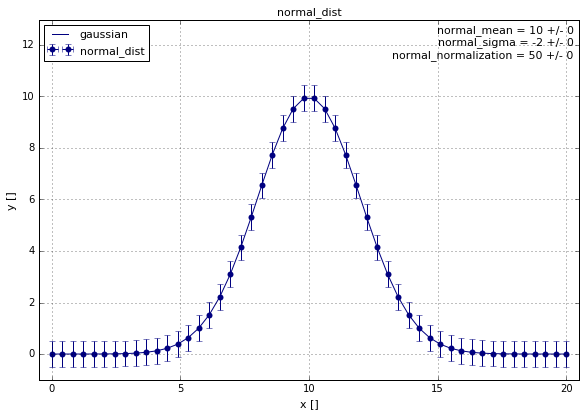

In [13]:
import numpy as np

#Generate 50 equally spaced values along x, between 0 and 20
xvalues = np.linspace(0,20,50)

#Define a function that returns the normal distribution:
def normal(x, mean, sigma, norm):
    return norm*1./np.sqrt(2.*3.14*sigma**2)*np.exp( -((x-mean)/sigma)**2/2)

#Use our function on all of the x values to generate y values
yvalues = normal(xvalues, mean=10, sigma=2, norm=50)

#Create a plot with constant uncertainties in y 
fig9 = q.MakePlot(xdata=xvalues, ydata=yvalues, yerr=0.5,
                  data_name='normal_dist', xname='x',yname='y')

#Just for fun, let's fit the data.
#This returns some extra text with the results of the fit, and
#adds a fitted line to the plot
fig9.fit("gaussian")
#Note that in this case, because the data are exactly along the fit
#line, the fitter assigns uncertainties of 0 to the fitted parameters!

#We can overwrite the default color for the plot 
#(which corresponds to dataset 0)
fig9.datasets_colors[0]='navy'
fig9.show()


-----------------Fit results-------------------
Fit of  normal_dist  to  gaussian
Fit parameters:
normal_dist_gaussian_fit0_fitpars_mean = 9.95 +/- 0.05,
normal_dist_gaussian_fit0_fitpars_sigma = 2.01 +/- 0.05,
normal_dist_gaussian_fit0_fitpars_normalization = 50 +/- 1

Correlation matrix: 
[[  1.000e+00  -3.831e-08  -1.855e-09]
 [ -3.831e-08   1.000e+00   5.774e-01]
 [ -1.855e-09   5.774e-01   1.000e+00]]

chi2/ndof = 12.38/46
---------------End fit results----------------



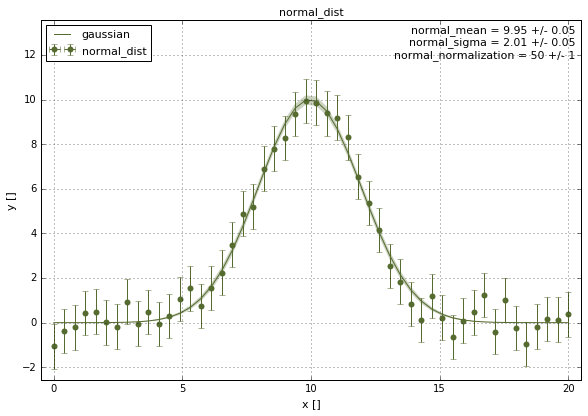

In [14]:
#If instead, we add some fluctuations to the y values, by using numpy
#to make some random numbers for us, the fit parameters will have 
#uncertainties:

#Add some randomness to the yvalues (by choosing normally
#distributed number about the original values)
yvalues = np.random.normal(yvalues, 0.5)
fig10 = q.MakePlot(xdata=xvalues, ydata=yvalues, yerr=1.0,
                  data_name='normal_dist', xname='x',yname='y')
fig10.fit("gaussian", parguess=[10,2,50])
fig10.datasets_colors[0]='darkolivegreen'
fig10.show()